In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from pylab import subplot
from pylab import subplots_adjust
import scipy

In [2]:
data = pd.read_table('daf.joint.no00', header=[0])

In [43]:
print(data['avgCov'].mean())
print(data['avgCov'].std())

6.927236894583296
1.0699504557299675


In [11]:
cov_mean = 7
cov_std = 1

cov_min = cov_mean - (3*cov_std)
cov_max = cov_mean + (5*cov_std)

#fliters applied for counting synonymous/missense segregating/fixed and their ratios
df = data[(data['avgCov']>cov_min)&
             (data['avgCov']<cov_max)&
             (data['total_out']>3)&
             (data['flagPol']=='unfolded')&
             (data['flagQual']=='snp')&
             (data['vartype']=='intergenic')&
             (data['total1']==48)&
             (data['total2']==48)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


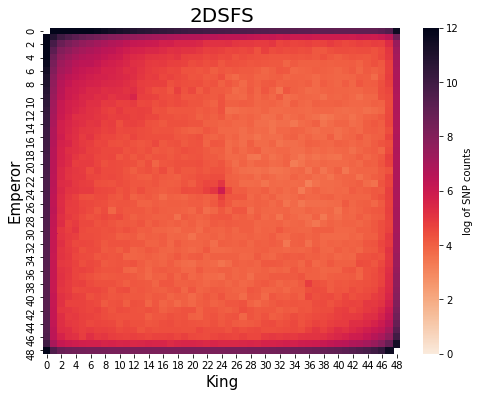

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8, 6), facecolor='w', edgecolor='k')

cmap = sns.cm.rocket_r
histo, xedges, yedges = np.histogram2d(df['derived2'], df['derived1'], bins=49)
ax = sns.heatmap(np.log(histo), vmin=0, vmax=12, cmap=cmap, cbar_kws={'label': 'log of SNP counts'})

plt.title('2DSFS', fontsize = 20) 
plt.xlabel('King', fontsize = 15)
plt.ylabel('Emperor', fontsize = 15)

fig.savefig('2dSFS.cov'+str(cov_min)+'-'+str(cov_max)+'_out4.nomiss.intergenic.pdf', bbox_inches='tight')